In [12]:
import pandas as pd
import numpy as np
import sympy as sym
from scipy import constants
import matplotlib.pyplot as plt
from scipy import optimize

In [13]:
df = pd.read_excel("Photons.xlsx")
df_ = df.transpose() # Corriente en mA, Voltaje en V.
degrees = 90 - df["degree"]
info = ["current (19.8 V)", "current (18.9 V)", "current (17.9 V)", "current (16.9 V)", "current (15.9 V)", "current (14.9 V)", "current (13.9 V)", "current (12.9 V)", "current (12 V)", "current (11 V)", "current (10)", "current (9 V)", "current (7.9 V)", "current (7 V)", "current (6 V)", "current (5 V)", "current (3.9 V)", "current (2.9 V)", "current (2 V)", "current (1 V)"]
df

,degree,current (19.8 V),current (18.9 V),current (17.9 V),current (16.9 V),current (15.9 V),current (14.9 V),current (13.9 V),current (12.9 V),current (12 V),...,current (10),current (9 V),current (7.9 V),current (7 V),current (6 V),current (5 V),current (3.9 V),current (2.9 V),current (2 V),current (1 V)
0,0,44.3,41.4,44.2,42.0,39.4,36.8,32.1,30.6,28.3,...,24.2,21.5,17.4,15.8,13.6,11.3,8.9,6.7,4.4,2.2
1,10,41.2,40.9,43.7,41.4,39.2,36.6,31.8,30.4,28.1,...,24.0,21.3,17.1,15.5,13.3,11.0,8.7,6.4,4.4,2.2
2,20,38.8,38.5,41.1,39.3,37.0,34.9,30.1,28.7,26.9,...,23.0,20.2,16.2,15.0,12.7,10.7,8.4,6.2,4.1,2.1
3,30,34.2,34.8,36.6,34.7,33.3,31.0,26.9,25.8,23.5,...,20.3,17.8,14.4,13.4,11.4,9.6,7.4,5.6,3.7,1.8
4,40,28.0,29.0,30.4,28.3,27.3,25.7,21.5,21.3,19.9,...,16.7,15.2,12.0,11.1,9.6,7.9,6.5,4.7,3.0,1.5
5,50,21.7,22.1,23.6,22.3,21.4,19.2,16.4,16.5,14.5,...,13.0,11.5,9.1,8.4,7.2,5.9,4.8,3.6,2.3,1.2
6,60,15.2,14.8,16.1,15.0,13.8,12.8,10.8,10.7,9.8,...,8.4,7.4,6.0,5.6,4.8,4.2,3.1,2.4,2.6,0.7
7,70,7.5,8.1,8.5,7.6,7.7,6.7,5.7,5.8,5.3,...,4.5,4.0,3.3,2.9,2.6,2.3,1.7,1.2,0.8,0.4
8,80,2.8,2.9,2.8,2.5,2.6,2.2,2.0,2.2,1.5,...,1.5,1.4,1.1,1.0,0.9,0.7,0.6,0.4,0.3,0.1
9,90,1.1,1.0,1.1,1.0,0.9,0.8,0.7,0.7,0.6,...,0.6,0.5,0.4,0.3,0.2,0.2,0.2,0.1,0.1,0.0


In [38]:
df_

,0,1,2,3,4,5,6,7,8,9
degree,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
current (19.8 V),44.3,41.2,38.8,34.2,28.0,21.7,15.2,7.5,2.8,1.1
current (18.9 V),41.4,40.9,38.5,34.8,29.0,22.1,14.8,8.1,2.9,1.0
current (17.9 V),44.2,43.7,41.1,36.6,30.4,23.6,16.1,8.5,2.8,1.1
current (16.9 V),42.0,41.4,39.3,34.7,28.3,22.3,15.0,7.6,2.5,1.0
current (15.9 V),39.4,39.2,37.0,33.3,27.3,21.4,13.8,7.7,2.6,0.9
current (14.9 V),36.8,36.6,34.9,31.0,25.7,19.2,12.8,6.7,2.2,0.8
current (13.9 V),32.1,31.8,30.1,26.9,21.5,16.4,10.8,5.7,2.0,0.7
current (12.9 V),30.6,30.4,28.7,25.8,21.3,16.5,10.7,5.8,2.2,0.7
current (12 V),28.3,28.1,26.9,23.5,19.9,14.5,9.8,5.3,1.5,0.6


Text(0, 0.5, 'Voltage [V]')

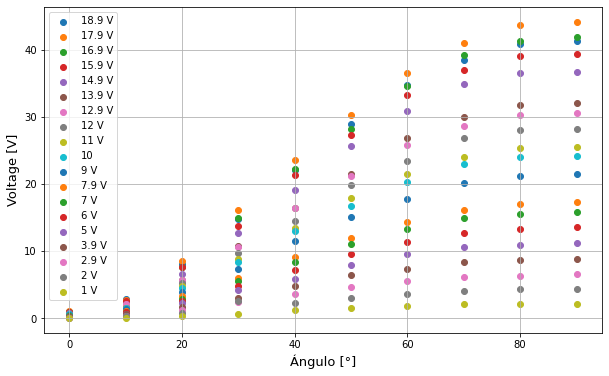

In [21]:
values = {}
plt.figure(figsize = (10, 6))
mote = []
for i in range(1, len(info)):
    coef = np.polyfit(degrees, df[info[i]], 2)
    values[i] = coef
    plt.scatter(degrees, df[info[i]])
    mote.append(info[i].replace("current (", "").replace(")", ""))
plt.legend(mote)
plt.grid()
plt.xlabel("Ángulo [°]", fontsize = 13)
plt.ylabel("Voltage [V]", fontsize = 13)

Text(0, 0.5, 'Voltage [V]')

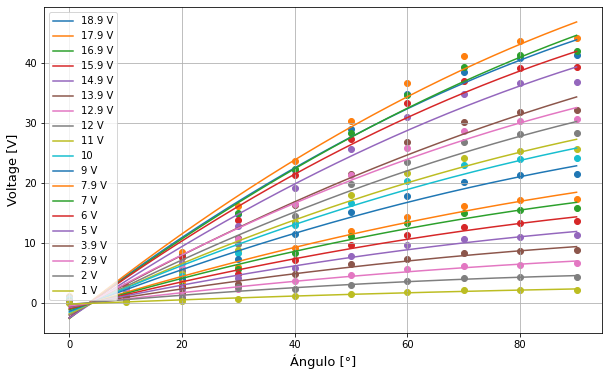

In [22]:
xdata = np.linspace(0, 90, 1000)
plt.figure(figsize = (10, 6))
mote_ = []

def ydata(a, x):
    return a[2] + a[1]*x + a[0]*(x**2)

for i in range(1, len(info)):
    plt.scatter(degrees, df[info[i]])
    plt.plot(xdata, ydata(values[i], xdata))
    mote_.append(info[i].replace("current (", "").replace(")", ""))
plt.legend(mote_)
plt.grid()
plt.xlabel("Ángulo [°]", fontsize = 13)
plt.ylabel("Voltage [V]", fontsize = 13)

Text(0.5, 0, 'Voltage [V]')

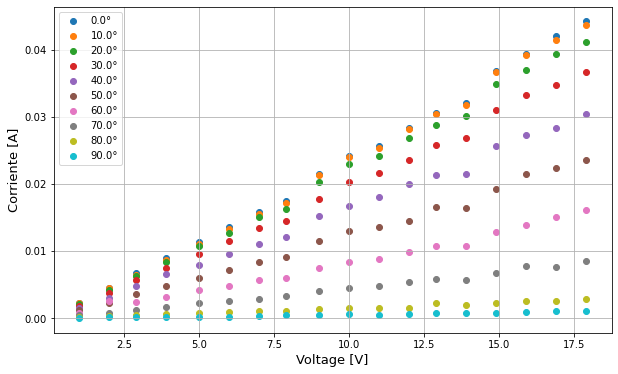

In [24]:
voltages = [19.8, 18.9, 17.9, 16.9, 15.9, 14.9, 13.9, 12.9, 12, 11, 10, 9, 7.9, 7, 6, 5, 3.9, 2.9, 2, 1]
values_ = {}
unc_ = {}
plt.figure(figsize = (10, 6))
mote__ = []

for i in range(0, 10):
    data = df_[i].to_numpy()[3:21]*1e-3
    coef_, cov_ = np.polyfit(voltages[2:20], data, 1, cov = True)
    values_[i] = coef_
    unc_[i] = np.sqrt(np.diag(cov_))
    plt.scatter(voltages[2:20], data)
    mote__.append(str(df_[i][0]) + "°")

plt.legend(mote__)
plt.grid()
plt.ylabel("Corriente [A]", fontsize = 13)
plt.xlabel("Voltage [V]", fontsize = 13)

La resistencia calculada para el conjunto de datos 0.0° es de (400.8927378407266 $\pm$ 3.435704417714115e-05) Ω
La resistencia calculada para el conjunto de datos 10.0° es de (403.3500119733307 $\pm$ 3.4860983272001874e-05) Ω
La resistencia calculada para el conjunto de datos 20.0° es de (427.6208249635887 $\pm$ 3.286052742320789e-05) Ω
La resistencia calculada para el conjunto de datos 30.0° es de (480.4918574274071 $\pm$ 2.8834360816079457e-05) Ω
La resistencia calculada para el conjunto de datos 40.0° es de (586.8090360120282 $\pm$ 2.737445919763016e-05) Ω
La resistencia calculada para el conjunto de datos 50.0° es de (756.297953460526 $\pm$ 2.6901820550553132e-05) Ω
La resistencia calculada para el conjunto de datos 60.0° es de (1156.7906887078889 $\pm$ 2.3635063739712523e-05) Ω
La resistencia calculada para el conjunto de datos 70.0° es de (2147.179854184371 $\pm$ 1.05516703742767e-05) Ω
La resistencia calculada para el conjunto de datos 80.0° es de (6445.72004028197 $\pm$ 5.76494

Text(0.5, 0, 'Voltage [V]')

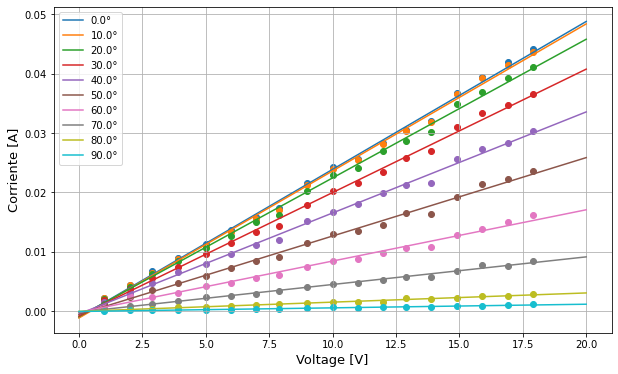

In [33]:
xdata_ = np.linspace(0, 20, 1000)
def ydata_(a, x):
    return  a[1] + a[0]*(x)

plt.figure(figsize = (10, 6))
mote___ = []
angle__ = []
resistance__ = []

for i in range(0, 10):
    data = df_[i].to_numpy()[3:21]*1e-3
    plt.scatter(voltages[2:20], data)
    plt.plot(xdata_, ydata_(values_[i], xdata_))
    print(r"La resistencia calculada para el conjunto de datos {} es de ({} $\pm$ {}) Ω".format(str(df_[i][0]) + "°", 1/values_[i][0], unc_[i][0]) )
    mote___.append(str(df_[i][0]) + "°")
    angle__.append(df_[i][0])
    resistance__.append(1/values_[i][0])

plt.legend(mote___)
plt.grid()
plt.ylabel("Corriente [A]", fontsize = 13)
plt.xlabel("Voltage [V]", fontsize = 13)

Text(0.5, 0, 'Angulo [°]')

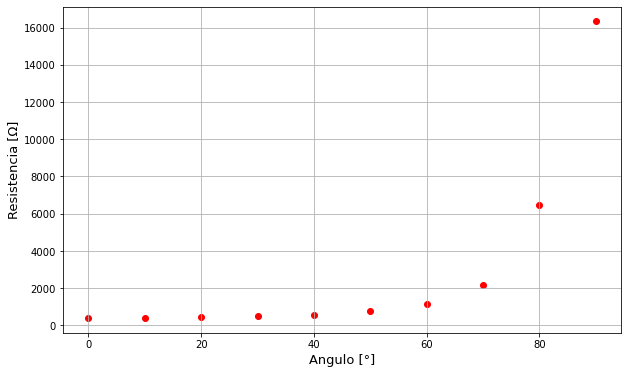

In [41]:
plt.figure(figsize = (10, 6))
plt.scatter(angle__, resistance__, color = "red")
plt.grid()
plt.ylabel("Resistencia [Ω]", fontsize = 13)
plt.xlabel("Angulo [°]", fontsize = 13)